In [123]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

In [65]:
query = "select * from customers limit 4"

In [66]:
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [67]:
query = "show tables"
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [68]:
query = "select * from salesdata limit 4"
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00


In [69]:
query = """select sd.customerid , c.firstname , sd.saledate , sd.totalprice
        from customers as c
        join salesdata as sd    
        on c.customerid = sd.customerid
        limit 5"""

In [70]:
read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [71]:
query = """
select t.customerid , c.firstname , t.expenditure 
from  
(select customerid ,
sum(totalprice) as expenditure
        from salesdata 
        group by customerid) as t
join customers as c
on t.customerid = c.customerid
limit 10;"""

In [72]:
top_10_annual_customers = read_query(query)

In [73]:
top_10_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [74]:
top_10_annual_customers["expenditure"].dtype

dtype('O')

In [75]:
top_10_annual_customers["expenditure"].values

array([Decimal('9933032.00'), Decimal('9779316.00'),
       Decimal('9889393.00'), Decimal('9168084.00'),
       Decimal('10315608.00'), Decimal('6676018.00'),
       Decimal('9002667.00'), Decimal('9416623.00'),
       Decimal('9290207.00'), Decimal('6842296.00')], dtype=object)

In [76]:
top_10_annual_customers["expenditure"] = top_10_annual_customers["expenditure"].astype(float)

In [77]:
top_10_annual_customers["expenditure"].dtype

dtype('float64')

In [78]:
expenditure1 = top_10_annual_customers["expenditure"].values

In [79]:
customer_names =top_10_annual_customers["firstname"].values

In [80]:
cmap_values = np.linspace(0.3,1,10)

In [81]:
cmap = plt.cm.PuBuGn(cmap_values)

<h1 style="color : red">Plotting a bar graph - using cmap and annotation 

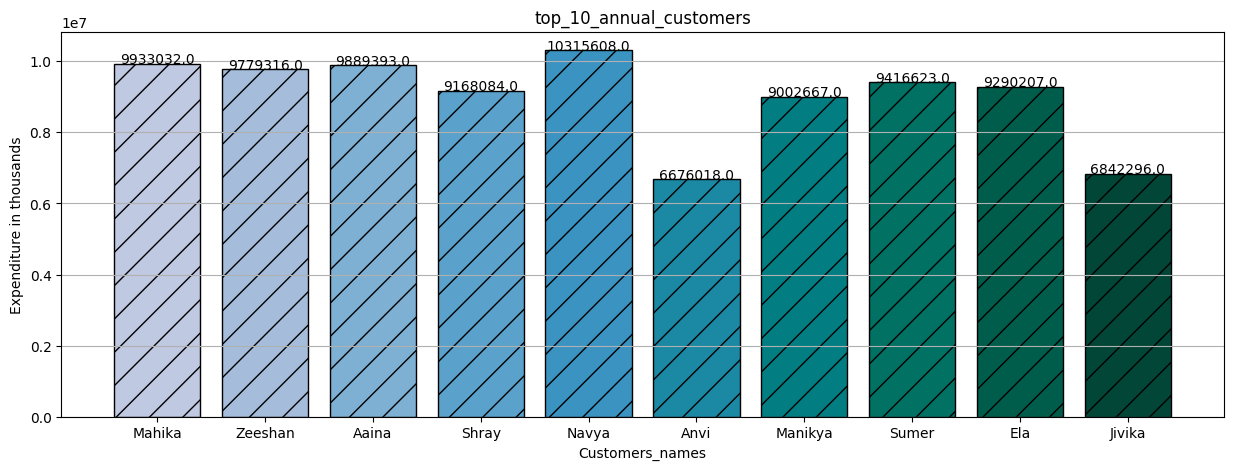

In [82]:
plt.figure(figsize =(15,5))
plt.title("top_10_annual_customers")
plt.xlabel("Customers_names")
plt.ylabel("Expenditure in thousands")
plt.bar( x = customer_names , height = expenditure1 , color = cmap , edgecolor = "black", hatch = "/")
for i in range(len(customer_names)):
    plt.annotate(text = f'{expenditure1[i]}' , xy = (i,expenditure1[i]+5) , horizontalalignment = "center")
plt.grid(axis = "y")
plt.savefig("top_10_annual_customers.jpeg")

In [83]:
query = """ show tables"""
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [84]:
query =""" select * from salesdata limit 5"""
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00


In [85]:
# in the month of january which employee how much sales he did 

In [86]:
query = """ select monthname(s.SaleDate) as monthname ,
 e.firstname , sum(s.totalprice) as total_Sale_in_january
from salesdata as s
join employees as e
on s.employeeid = e.employeeid
where monthname(s.SaleDate) = "January"
group by monthname(s.SaleDate) , e.firstname
order by total_Sale_in_january desc
limit 10;
"""

df = read_query(query= query)

In [87]:
df

,monthname,firstname,total_Sale_in_january
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
5,January,Yuvaan,3348039.00
6,January,Anika,3152408.00
7,January,Kiaan,3136727.00
8,January,Yasmin,3135779.00
9,January,Hiran,3104523.00


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   monthname              10 non-null     object
 1   firstname              10 non-null     object
 2   total_Sale_in_january  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [89]:
df["total_Sale_in_january"] = df["total_Sale_in_january"].astype(float)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthname              10 non-null     object 
 1   firstname              10 non-null     object 
 2   total_Sale_in_january  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [91]:
name_of_employees = df["firstname"].values

total_sale = df["total_Sale_in_january"].values

In [92]:
cm_values = np.linspace(0.3,1,10)
cm = plt.cm.Spectral(cm_values)

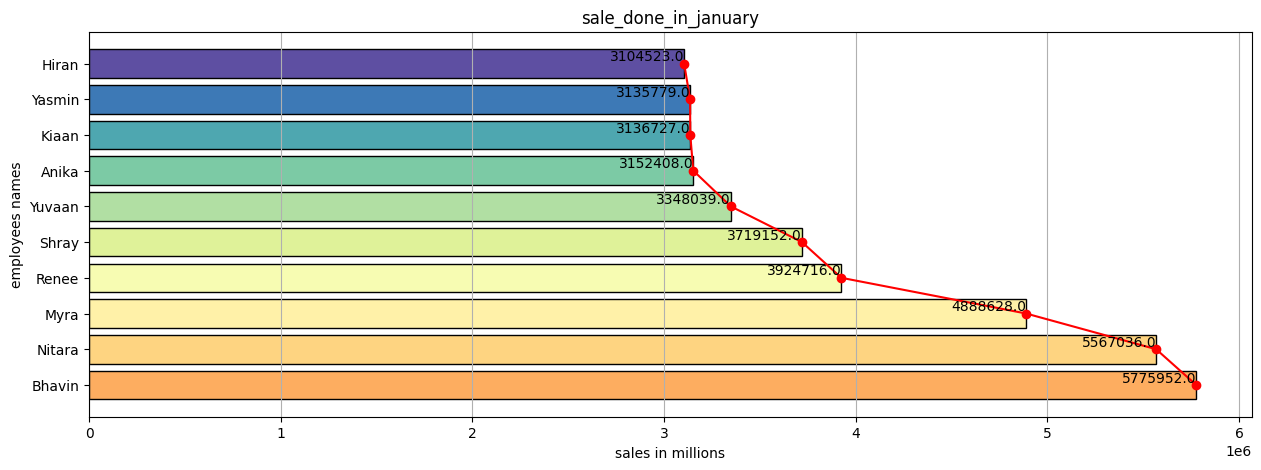

In [93]:
plt.figure(figsize =(15,5))

plt.plot(total_sale,name_of_employees , marker = "o" , color = "red")
plt.barh(y = name_of_employees , width = total_sale, color = cm , edgecolor = "black")
for i in range(len(total_sale)):
    plt.annotate(text = total_sale[i] , xy = (total_sale[i] , i) , horizontalalignment = "right",
                  verticalalignment = "bottom")


plt.title("sale_done_in_january")
plt.xlabel("sales in millions")
plt.ylabel("employees names")

plt.grid(axis = "x")



In [94]:
query = """ select t.month_name , t.monthlysales
from
(select month(saledate) as month_number ,
monthname(saledate) as month_name,
 sum(totalprice) as monthlysales
from salesdata
group by month(saledate) , monthname(saledate)
order by month(saledate)) as t;"""

df = read_query(query)

In [95]:
df

,month_name,monthlysales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


In [96]:
type(df)

pandas.core.frame.DataFrame

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month_name    12 non-null     object
 1   monthlysales  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [98]:
monthname = df["month_name"].values
df["monthlysales"] = df["monthlysales"].astype(float)
monthlysales = df["monthlysales"].values

In [99]:
avgsales = df["monthlysales"].mean()
print(avgsales)

149106174.0


In [100]:
# goalline - it is the profit we should have to cover all the expenses:
goal_line = avgsales*1.05


<h1 style = "color : Blue">Provide a visual representation of our annual sales performance over time

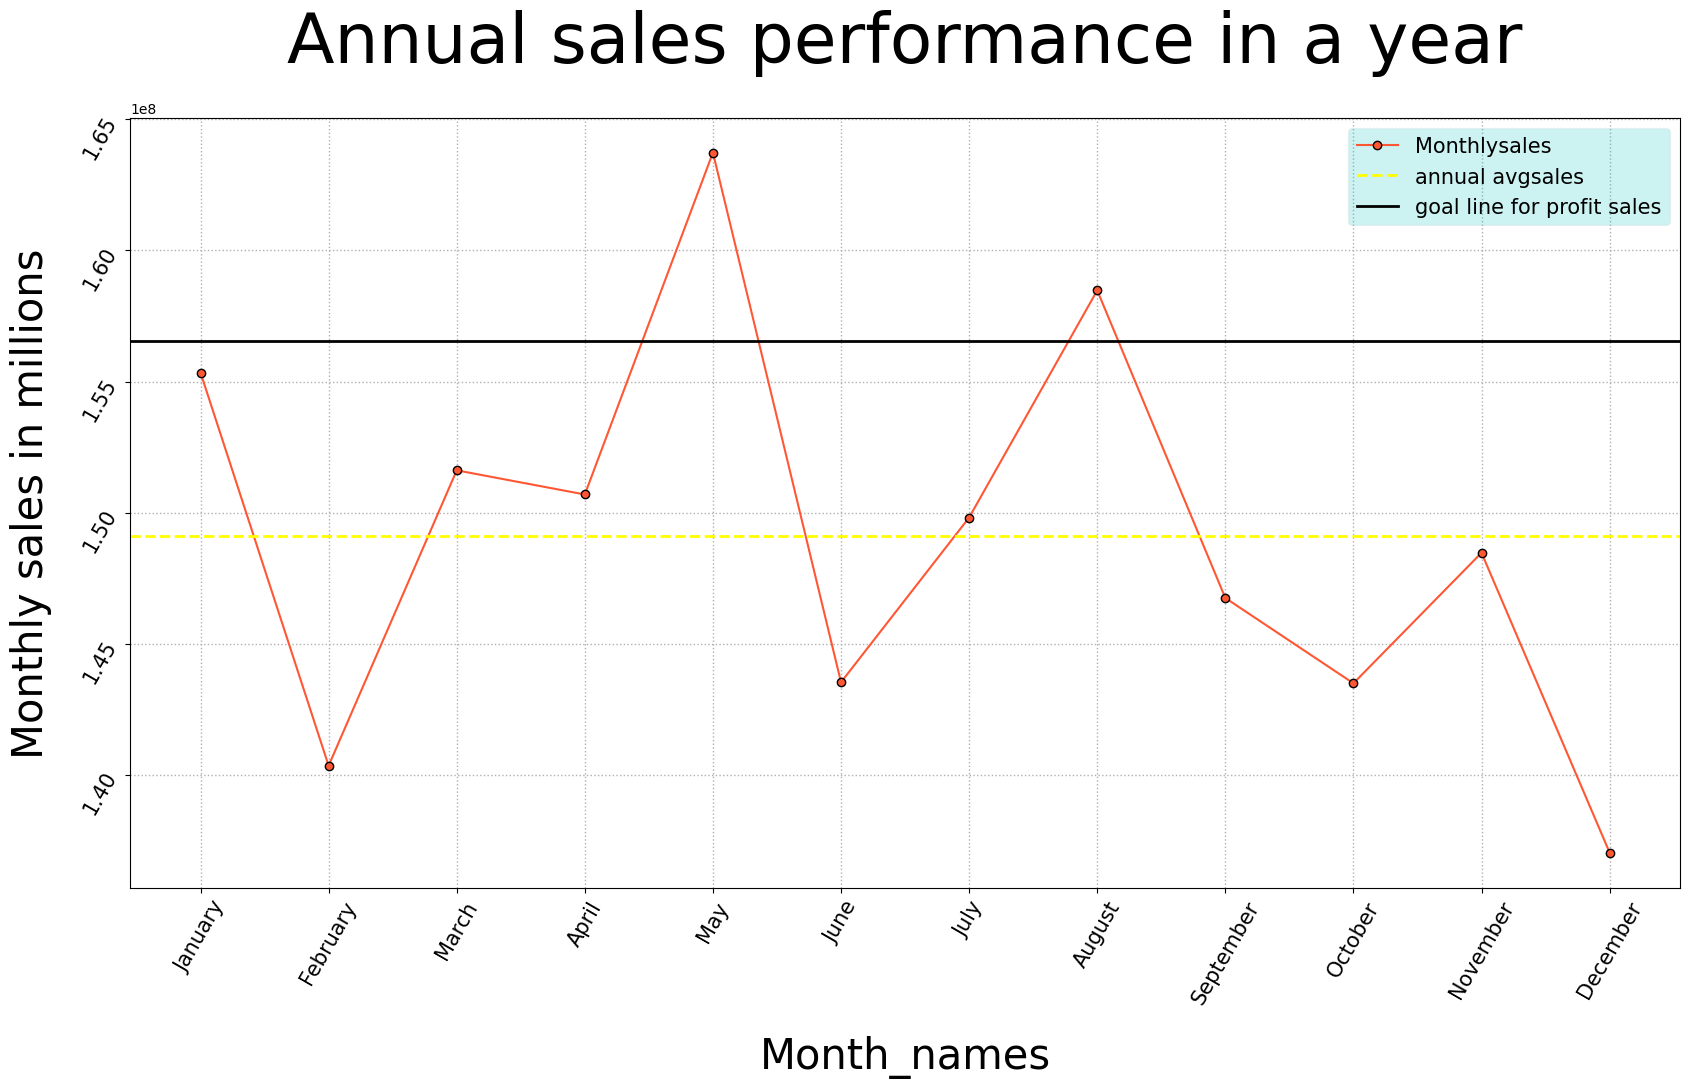

In [101]:
plt.figure(figsize =(20,10))

plt.plot(monthname , monthlysales, marker = "o" , color = "#FF5733" , markeredgecolor = "black" , label = "Monthlysales")



plt.axhline(y = avgsales ,linestyle='dashed',c='yellow',lw=2,ms=15 , label = "annual avgsales")
plt.axhline(y = goal_line ,linestyle='-',c='black',lw=2,ms=15 , label = "goal line for profit sales")
plt.title("Annual sales performance in a year" , pad = 40 , size = 50)

plt.xlabel("Month_names" , labelpad = 20, size = 30 )
plt.ylabel("Monthly sales in millions" , labelpad = 20 , size = 30 )

plt.xticks(size = 15 ,rotation = 60)
plt.yticks(size = 15 ,rotation = 60)

plt.legend(bbox_to_anchor=(1,1),fontsize=15,facecolor='c',framealpha=0.2,fancybox=True)
plt.grid(axis='both',ls='dotted',lw=1)

In [102]:
query = """
select t.monthlyname , t.monthlysales ,
lag(t.monthlysales) over() as previousmonthslagg,
((t.monthlysales) - (lag(t.monthlysales) over())) / (lag(t.monthlysales) over()) * 100 as growth_rate
from
(select month(saledate) , monthname(saledate) as monthlyname,
sum(totalprice) as monthlysales 
from salesdata
group by month(saledate) , monthname(saledate)
order by month(saledate)) as t;"""

df = read_query(query)

In [103]:
df.head(5)


,monthlyname,monthlysales,previousmonthslagg,growth_rate
0,January,155340130.00,None,None
1,February,140345189.00,155340130.00,-9.652973
2,March,151612551.00,140345189.00,8.028321
3,April,150691604.00,151612551.00,-0.607435
4,May,163734120.00,150691604.00,8.655105


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   monthlyname         12 non-null     object
 1   monthlysales        12 non-null     object
 2   previousmonthslagg  11 non-null     object
 3   growth_rate         11 non-null     object
dtypes: object(4)
memory usage: 516.0+ bytes


In [105]:
monthname = df["monthlyname"].values
monthsales = df["monthlysales"].astype(float).values
growthrate = df["growth_rate"].astype(float).values


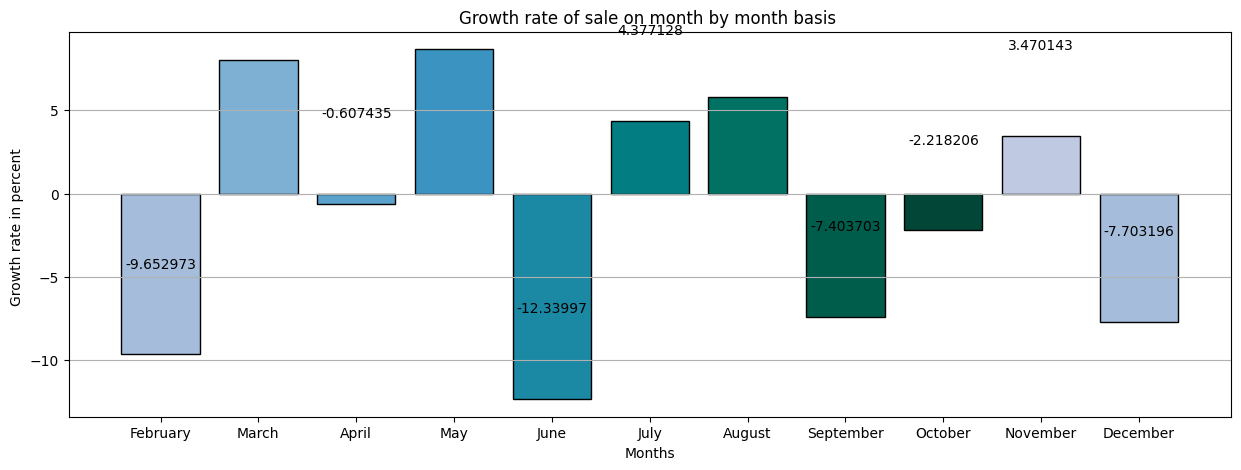

In [106]:
plt.figure(figsize =(15,5))
plt.title("Growth rate of sale on month by month basis ")
plt.xlabel("Months")
plt.ylabel("Growth rate in percent ")
plt.bar( x = monthname , height = growthrate , color = cmap , edgecolor = "black")
for i in range(len(monthname)):
    plt.annotate(text =  growthrate[i] , xy = (i,growthrate[i]+5) , horizontalalignment = "center" , verticalalignment = "bottom")
plt.grid(axis = "y")

<h1 style="color : blue"> total sales made by each employee

In [108]:
query = """  select EmployeeID , sum(totalprice) as Employeesales
from salesdata
group by EmployeeID
order by EmployeeID;"""

read_query(query)

,EmployeeID,Employeesales
0,1001,18231579.00
1,1002,18042772.00
2,1003,16151819.00
3,1004,13648670.00
4,1005,11565845.00
...,...,...
115,1116,17333826.00
116,1117,15910570.00
117,1118,12613265.00
118,1119,16623169.00


In [ ]:
query = """ select sd.EmployeeID , concat(e.firstname, " " ,e.lastname) as FullName  , e.email , e.Department , sum(sd.totalprice) as Employeesale
from salesdata as sd
join employees as e
on sd.employeeid = e.employeeid
group by sd.EmployeeID 
order by sum(sd.totalprice) desc;"""

df = read_query(query)

<h1 style = "color = Blue">the top 10 performing sales representatives based on their total sales volume

In [ ]:
df

,EmployeeID,FullName,email,Department,Employeesale
0,1115,Yuvaan Sidhu,fname.lname@swiftm.org,Sales,20895341.00
1,1017,Tiya Hari,fname.lname@swiftm.org,Sales,19035834.00
2,1029,Shaan Bhagat,fname.lname@swiftm.org,Marketing,18649467.00
3,1074,Stuvan Sekhon,fname.lname@swiftm.org,ML Engineer,18333919.00
4,1001,Fateh Roy,fname.lname@swiftm.org,Marketing,18231579.00
...,...,...,...,...,...
115,1005,Keya Dixit,fname.lname@swiftm.org,Logistics,11565845.00
116,1019,Nitara Ghosh,fname.lname@swiftm.org,Logistics,11412116.00
117,1015,Heer Kumar,fname.lname@swiftm.org,Accounts,11399241.00
118,1072,Kimaya Tata,fname.lname@swiftm.org,Accounts,10898982.00


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   EmployeeID    120 non-null    int64 
 1   FullName      120 non-null    object
 2   email         120 non-null    object
 3   Department    120 non-null    object
 4   Employeesale  120 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df["Employeesale"] = df["Employeesale"].astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EmployeeID    120 non-null    int64  
 1   FullName      120 non-null    object 
 2   email         120 non-null    object 
 3   Department    120 non-null    object 
 4   Employeesale  120 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.8+ KB


In [ ]:
Empname = np.array(df["FullName"].iloc[:10])
Empsales = np.array(df["Employeesale"].iloc[:10])
Empid = np.array(df["EmployeeID"].iloc[:10])


In [ ]:
avg_mean_sales = df["Employeesale"].mean()
print(avg_mean_sales)

14910617.4


In [ ]:
cmap_values = np.linspace(0.3,1,10)
cmap = plt.cm.Oranges_r(cmap_values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


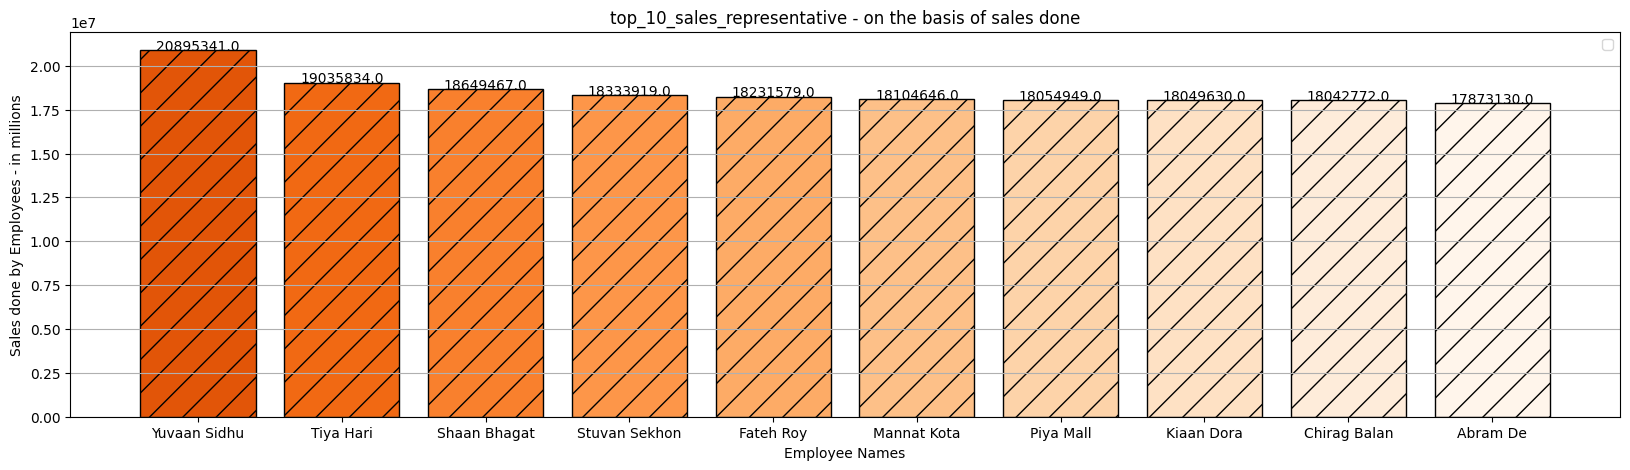

In [ ]:
plt.figure(figsize =(20,5))

plt.bar(x = Empname , height = Empsales , color = cmap , edgecolor = "black" , hatch = "/")
for i in range(len(Empname)):
    plt.annotate(text = f'{Empsales[i]}' , xy = (i,Empsales[i]+5) , horizontalalignment = "center") 



plt.title("top_10_sales_representative - on the basis of sales done")
plt.xlabel("Employee Names")
plt.ylabel("Sales done by Employees - in millions")

plt.grid(axis="y")
plt.legend()
plt.show()

In [109]:
query = """ select  c.CategoryName as Category_name , sum(sd.totalprice) as Individual_category_sales
from salesdata as sd
join subcategories as sc
on sc.SubcatID = sd.SubcatID
join  categories as c
on c.CategoryID = sc.CategoryID
group by c.CategoryName
order by Individual_category_sales desc;"""

df = read_query(query)


In [111]:
df

,Category_name,Individual_category_sales
0,Pet Supplies and Accessories,361848986.00
1,Health and Wellness Products,324761329.00
2,Electronics and Gadgets,319374417.00
3,Books and Educational Materials,282897933.00
4,Home and Kitchen Appliances,269316684.00
5,Outdoor and Sports Equipment,231074739.00


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Category_name              6 non-null      object
 1   Individual_category_sales  6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes


In [119]:
category_names = df["Category_name"].values
df["Individual_category_sales"] = df["Individual_category_sales"].astype(float)
category_sales = df["Individual_category_sales"].values

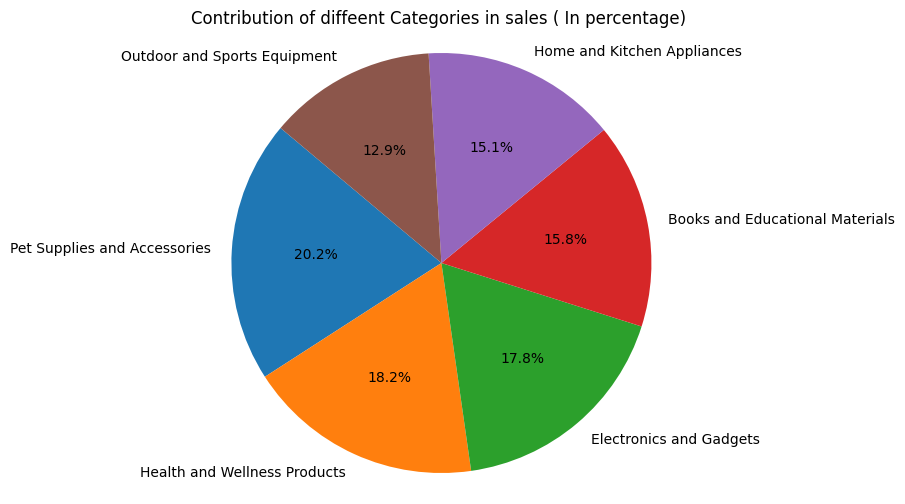

In [128]:
plt.figure(figsize=(10, 6))

plt.pie(category_sales, labels=category_names, autopct='%1.1f%%', startangle=140)

plt.title('Contribution of diffeent Categories in sales ( In percentage) ')

plt.axis('equal') 
plt.show()

<H1 stype "color = blue" >How many customers are there in each state

In [130]:
query = """select state , count(CustomerID) as total_customers
from customers 
group by state
order by total_customers desc;"""

df = read_query(query)

In [131]:
df

,state,total_customers
0,Manipur,14
1,Goa,14
2,Bihar,14
3,Nagaland,11
4,Himachal Pradesh,11
5,Arunachal Pradesh,11
6,Karnataka,11
7,Assam,10
8,Tripura,10
9,Chhattisgarh,10


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            21 non-null     object
 1   total_customers  21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [133]:
statenames = df["state"].values
counts = df["total_customers"].astype(int).values

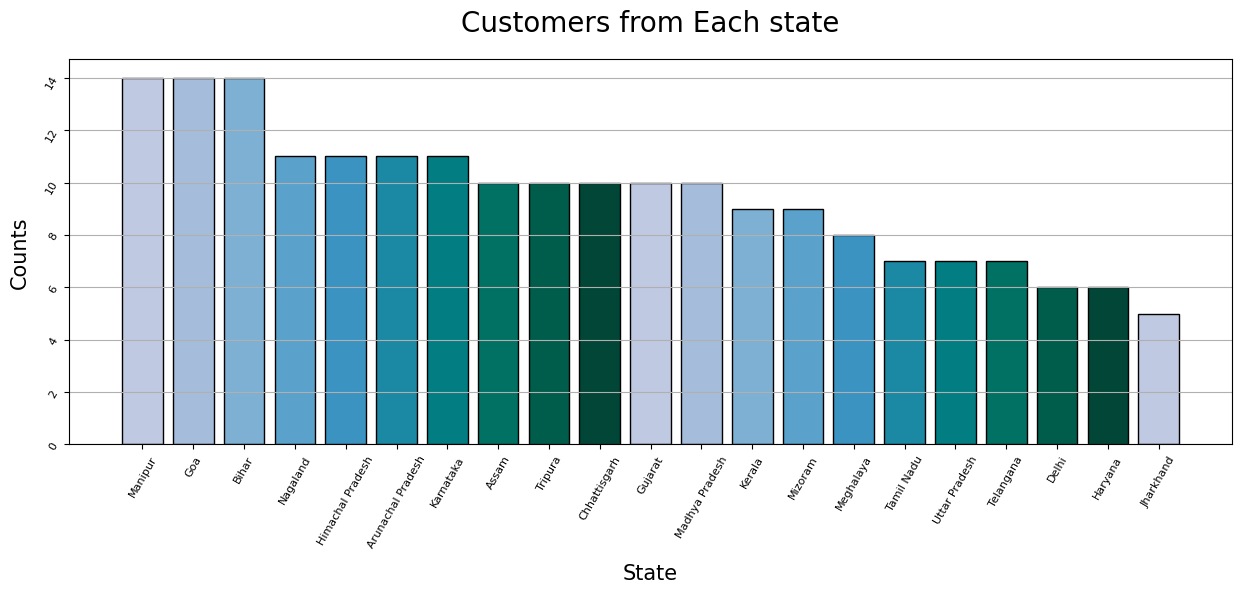

In [138]:
plt.figure(figsize =(15,5))

plt.bar( x = statenames , height = counts, color = cmap , edgecolor = "black")

plt.title("Customers from Each state" , pad = 20, size = 20)
plt.xlabel("State" , labelpad = 10, size = 15)
plt.ylabel("Counts", labelpad = 10, size = 15)


plt.xticks(size = 8 ,rotation = 60)
plt.yticks(size = 8 ,rotation = 60)

plt.grid(axis = "y")

# What is the average quantity of each product sold?

In [139]:
query = """ select sub.SubcatName as Product_Name , count(sd.quantity) as number_of_products_sold , avg(sd.quantity) AS average_quantity_sold 
from salesdata as sd
join subcategories as sub
on  sd.SubcatID = sub.SubcatID
group by sub.SubcatName
order by average_quantity_sold desc;"""

df = read_query(query)

In [140]:
df.head()

,Product_Name,number_of_products_sold,average_quantity_sold
0,Resistance bands,397,3.1587
1,Workbooks,361,3.1496
2,Camping tent,411,3.1071
3,Foam roller,398,3.0980
4,Portable power banks,462,3.0974


In [142]:
productname = df["Product_Name"].values

quantityaverage = df["average_quantity_sold"].astype(float).values

In [144]:
mean_avg_of_quantity_sold =  quantityaverage.mean()

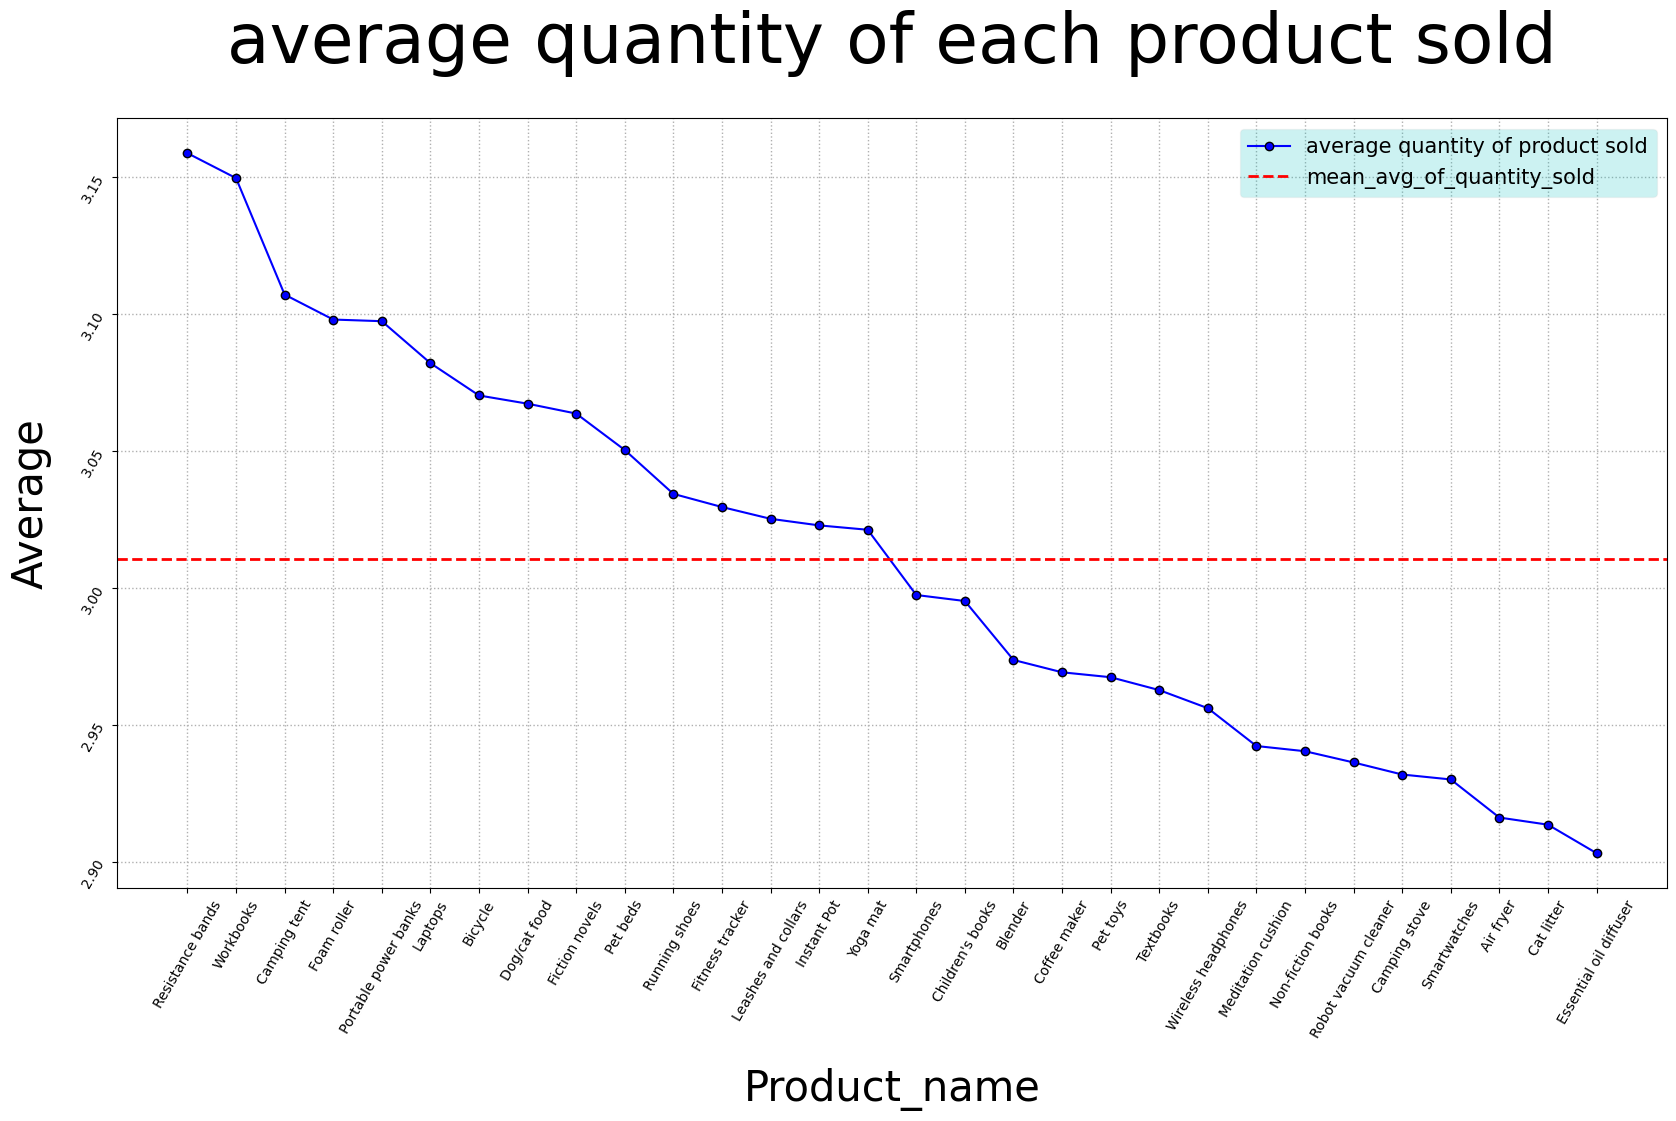

In [147]:
plt.figure(figsize =(20,10))

plt.plot(productname , quantityaverage , marker = "o" , color = "#0000FF" , markeredgecolor = "black" , label = "average quantity of product sold")



plt.axhline(y = mean_avg_of_quantity_sold ,linestyle='--',c='red',lw=2,ms=15 , label = "mean_avg_of_quantity_sold")

plt.title("average quantity of each product sold" , pad = 40 , size = 50)

plt.xlabel("Product_name" , labelpad = 20, size = 30 )
plt.ylabel("Average" , labelpad = 20 , size = 30 )

plt.xticks(size = 10 ,rotation = 60)
plt.yticks(size = 10 ,rotation = 60)

plt.legend(bbox_to_anchor=(1,1),fontsize=15,facecolor='c',framealpha=0.2,fancybox=True)
plt.grid(axis='both',ls='dotted',lw=1)